Simple Exponential Smoothing

In [2]:
rain.data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
rain.ts <-ts(rain.data, start=c(1813))

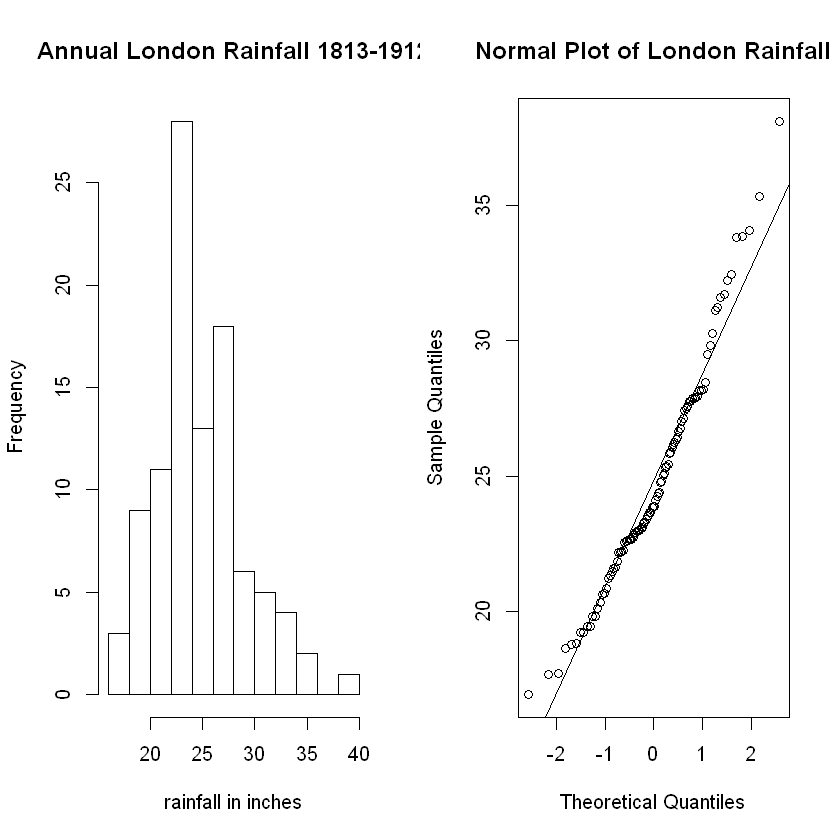

In [3]:
par(mfrow = c(1,2))
hist(rain.data, main = "Annual London Rainfall 1813-1912", xlab="rainfall in inches")
qqnorm(rain.data, main="Normal Plot of London Rainfall")
qqline(rain.data)

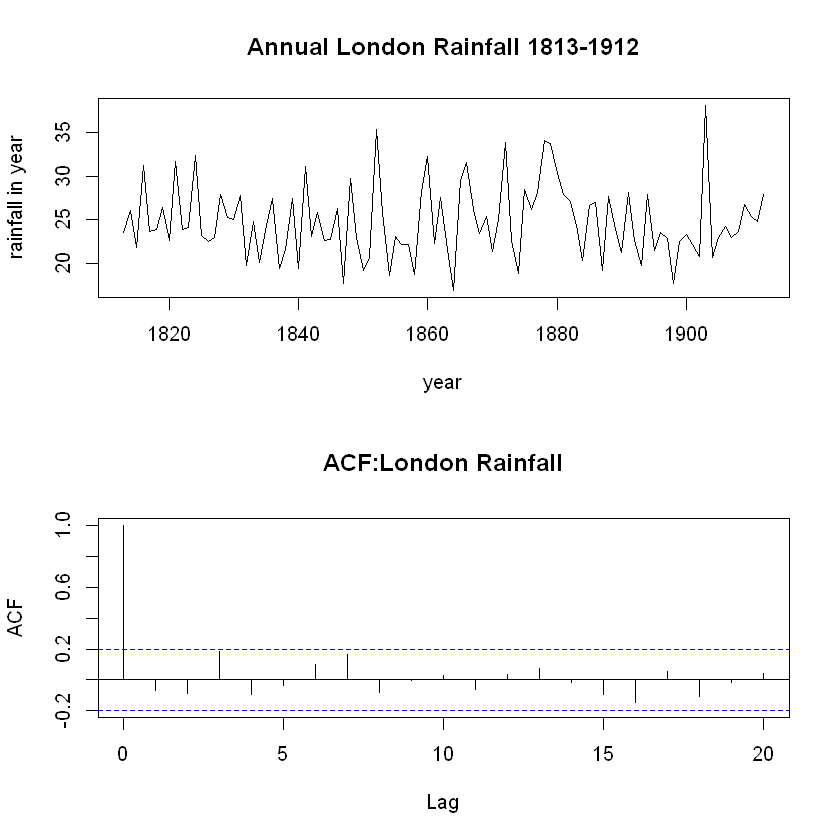

In [4]:
par(mfrow=c(2,1))
plot.ts(rain.ts, main="Annual London Rainfall 1813-1912", xlab="year",ylab="rainfall in year")
acf(rain.ts,main="ACF:London Rainfall")

In [5]:
alpha = 0.2
forecast.values = NULL

n = length(rain.data)

#naive first forecast
forecast.values[1] = rain.data[1]

for(i in 1:n){
    forecast.values[i+1] = alpha*rain.data[i] + (1- alpha)*forecast.values[i]
}
paste("forecast for time", n+1," = ",forecast.values[n+1])

[1] "forecast for time 101  =  25.3094062064236"

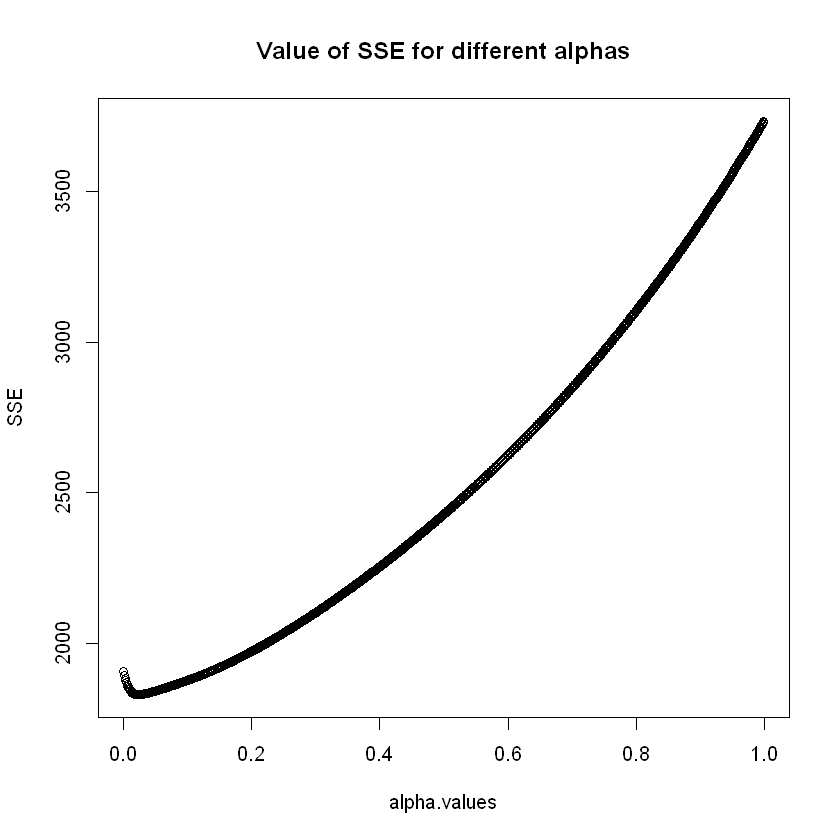

In [6]:
# Calculating Sum of square errors for diffrent values of alpha
SSE = NULL
n = length(rain.data)
alpha.values = seq(0.001,0.999,by=0.001)
number.alphas = length(alpha.values)

for(k in 1:number.alphas){
    forecast.values = NULL
    alpha = alpha.values[k]
    forecast.values[1] = rain.data[1]
    for(i in 1:n){
        forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
    }
    SSE[k] = sum((forecast.values[1:n] - rain.data[1:n])^2)
}
plot(SSE~alpha.values, main = "Value of SSE for different alphas")

In [7]:
indexOfSmallestSSE = which.min(SSE)
alpha.values[which.min(SSE)]

[1] 0.024

In [8]:
#Forecast value at optimal alpha
alpha = 0.024
forecast.values = NULL

n = length(rain.data)

#naive first forecast
forecast.values[1] = rain.data[1]

for(i in 1:n){
    forecast.values[i+1] = alpha*rain.data[i] + (1- alpha)*forecast.values[i]
}
paste("forecast for time", n+1," = ",forecast.values[n+1])

[1] "forecast for time 101  =  24.6771392918524"

In [10]:
# Holt Winters forcasting proceure SES by turning of Seasnal and trend effects
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819